In [18]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

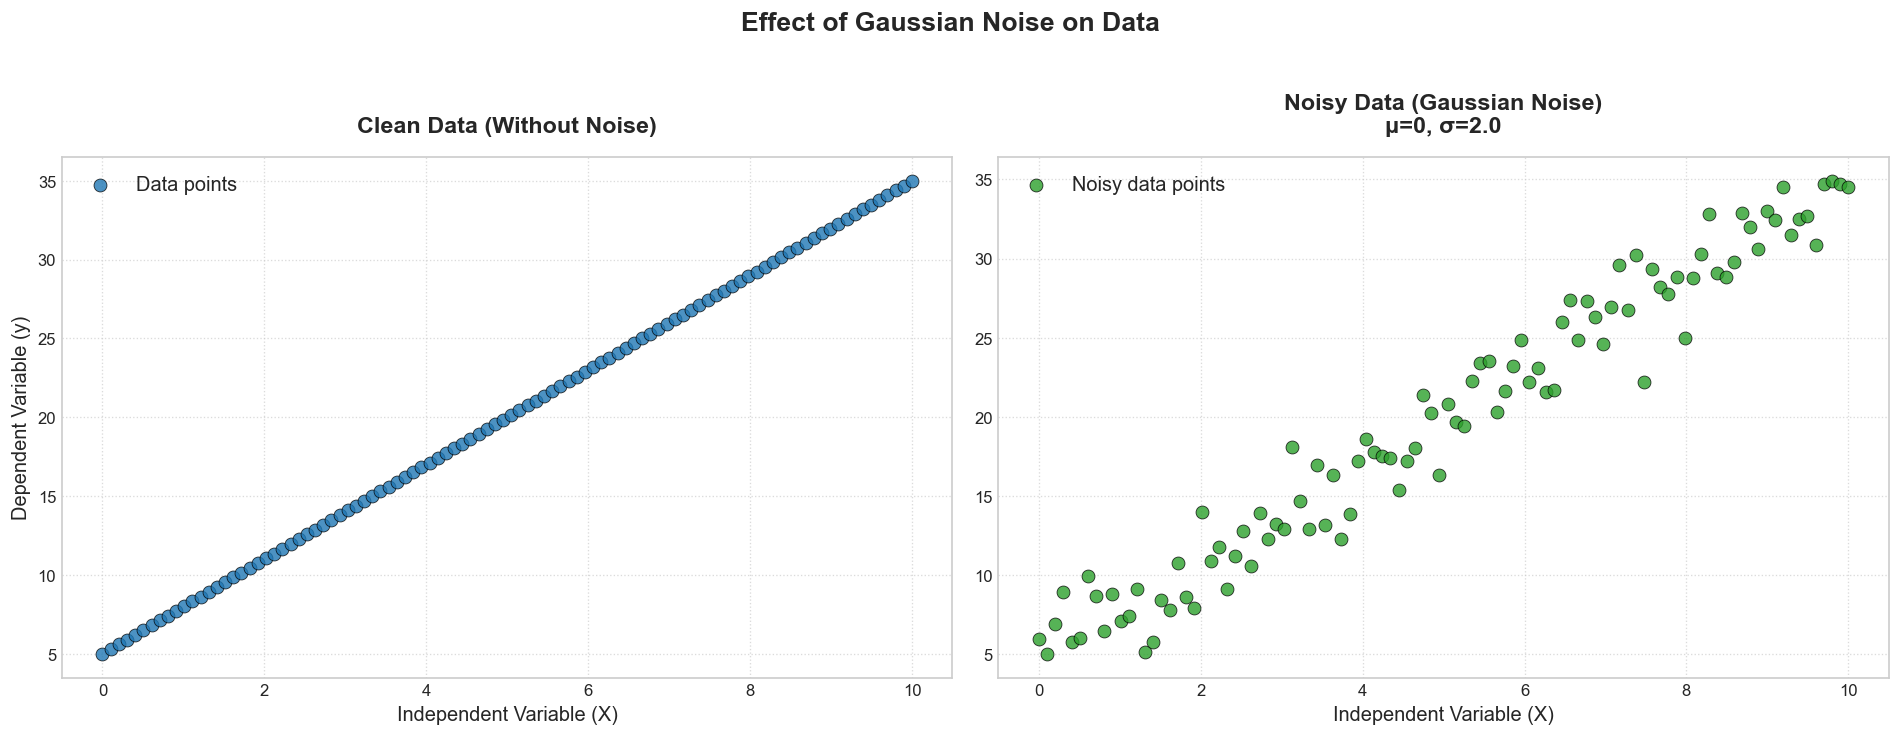


Noise Statistics:
- Noise mean: -0.2077
- Noise standard deviation: 1.8072
- Minimum noise value: -5.2395
- Maximum noise value: 3.7046
- Signal-to-Noise Ratio (SNR): 4.84


In [30]:
# Generate sample data with separate Gaussian noise
# Set global plot parameters for high quality output
plt.style.use('seaborn-v0_8-whitegrid')  # Updated style name for newer matplotlib versions
rcParams['figure.dpi'] = 300
rcParams['savefig.dpi'] = 300
rcParams['font.size'] = 12
rcParams['axes.labelsize'] = 12
rcParams['axes.titlesize'] = 14
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
sns.set_palette("deep")

# Noise parameters
noise_mean = 0  # Mean of Gaussian noise
noise_std = 2.0   # Standard deviation of Gaussian noise

# Generate data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)  # Evenly spaced values for better visualization

# True underlying relationship
y_true = 3 * X + 5

# Generate Gaussian noise
noise = np.random.normal(loc=noise_mean, scale=noise_std, size=(100, 1))

# Noisy data
y = y_true + noise

# Create figure with enhanced quality
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), dpi=120)

# Plot 1: Clean data
ax1.scatter(X, y_true, color='#1f77b4', alpha=0.8, s=60, edgecolor='k', linewidth=0.5, label='Data points')
#ax1.plot(X, y_true, color='#d62728', linewidth=3, label='True relationship')
ax1.set_title('Clean Data (Without Noise)', fontweight='bold', pad=15)
ax1.set_xlabel('Independent Variable (X)')
ax1.set_ylabel('Dependent Variable (y)')
ax1.legend(framealpha=1, shadow=True)
ax1.grid(True, linestyle=':', alpha=0.7)

# Plot 2: Noisy data
ax2.scatter(X, y, color='#2ca02c', alpha=0.8, s=60, edgecolor='k', linewidth=0.5, label='Noisy data points')
#ax2.plot(X, y_true, color='#d62728', linewidth=3, label='True relationship')
ax2.set_title(f'Noisy Data (Gaussian Noise)\nμ={noise_mean}, σ={noise_std}', fontweight='bold', pad=15)
ax2.set_xlabel('Independent Variable (X)')
ax2.legend(framealpha=1, shadow=True)
ax2.grid(True, linestyle=':', alpha=0.7)

# Add figure title
fig.suptitle('Effect of Gaussian Noise on Data', y=1.02, fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

# Print noise statistics
print("\nNoise Statistics:")
print(f"- Noise mean: {np.mean(noise):.4f}")
print(f"- Noise standard deviation: {np.std(noise):.4f}")
print(f"- Minimum noise value: {np.min(noise):.4f}")
print(f"- Maximum noise value: {np.max(noise):.4f}")
print(f"- Signal-to-Noise Ratio (SNR): {np.std(y_true)/np.std(noise):.2f}")

In [31]:
# Create and train the model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [32]:
# Extract coefficients (a and b)
a = model.coef_[0][0]  # Slope
b = model.intercept_[0]  # Intercept

In [33]:
# Calculate metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
equation = f"y = {a:.2f}X + {b:.2f}"

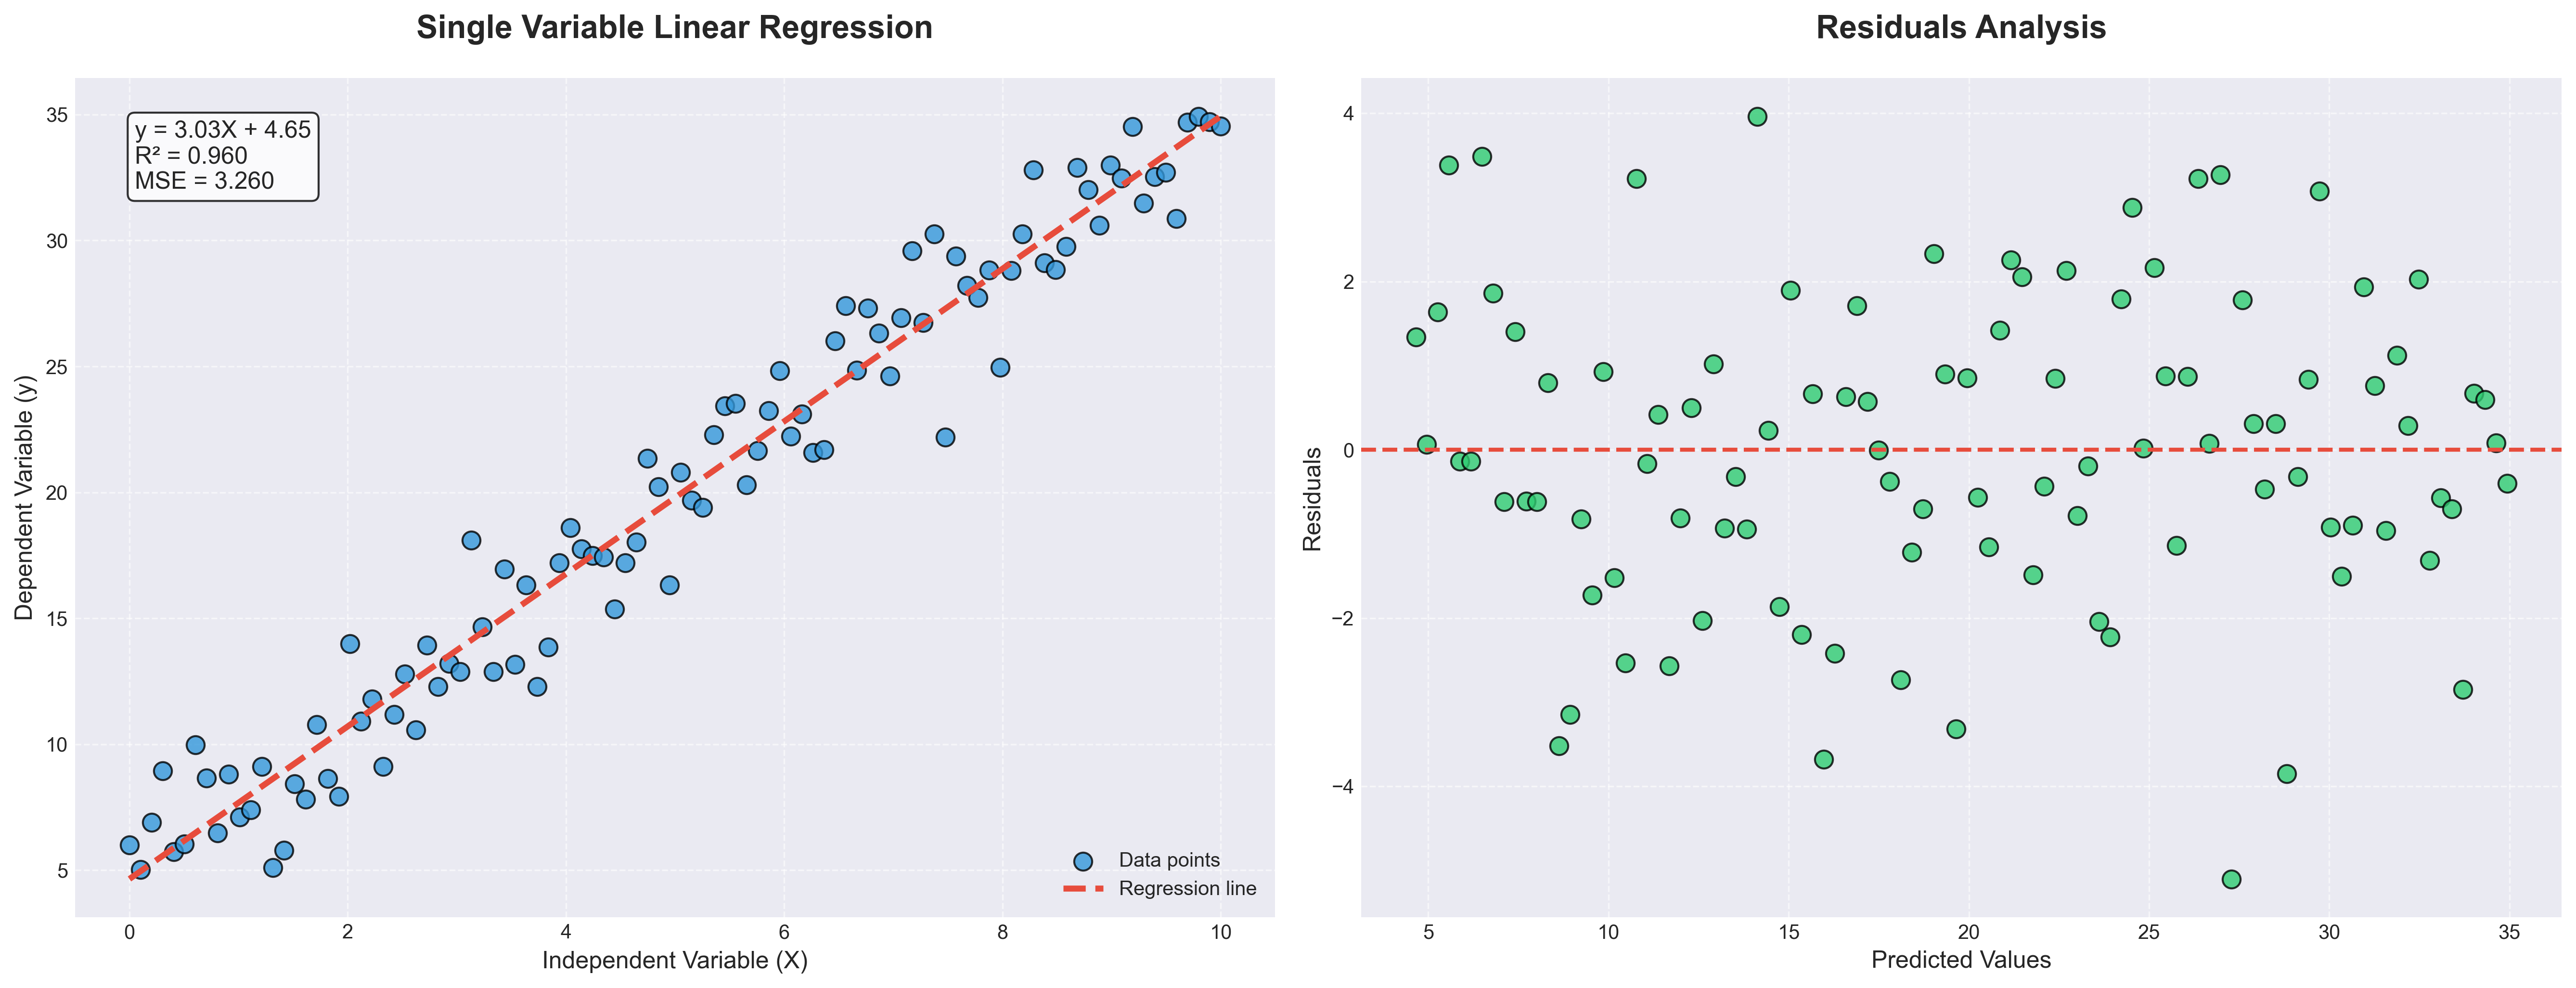

In [34]:
# Set global style for beautiful plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

## First plot: Data points and regression line
ax1.scatter(X, y, color='#3498db', edgecolor='black', alpha=0.8, s=80, label='Data points')
ax1.plot(X, y_pred, color='#e74c3c', linewidth=3, linestyle='--', label='Regression line')

# Add equation and metrics to plot
textstr = f'{equation}\nR² = {r2:.3f}\nMSE = {mse:.3f}'
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, 
        verticalalignment='top', bbox=props, fontsize=12)

# Customize first plot
ax1.set_title('Single Variable Linear Regression', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Independent Variable (X)', fontsize=12)
ax1.set_ylabel('Dependent Variable (y)', fontsize=12)
ax1.legend(loc='lower right', fontsize=10)
ax1.grid(True, linestyle='--', alpha=0.6)

## Second plot: Residuals analysis
residuals = y - y_pred
ax2.scatter(y_pred, residuals, color='#2ecc71', edgecolor='black', alpha=0.8, s=80)
ax2.axhline(y=0, color='#e74c3c', linestyle='--', linewidth=2)

# Customize second plot
ax2.set_title('Residuals Analysis', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Predicted Values', fontsize=12)
ax2.set_ylabel('Residuals', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [35]:
# Print model summary
print("\033[1m" + "Regression Model Results:" + "\033[0m")
print(f"- Regression equation: {equation}")
print(f"- Coefficient a (slope): {a:.4f}")
print(f"- Coefficient b (intercept): {b:.4f}")
print(f"- Coefficient of determination (R²): {r2:.4f}")
print(f"- Mean squared error (MSE): {mse:.4f}")

Regression Model Results:
- Regression equation: y = 3.03X + 4.65
- Coefficient a (slope): 3.0276
- Coefficient b (intercept): 4.6544
- Coefficient of determination (R²): 0.9599
- Mean squared error (MSE): 3.2596


In [36]:
# Finish